In [1]:
!nvidia-smi

Sat Aug 30 09:35:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
#installing Ultralytics
!pip install Ultralytics

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.5/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [5]:
!pip install roboflow

## Downloading the **dataset**

In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="YrwQJSREGqQDLjoxfiI3")
project = rf.workspace("pristine").project("facial-emotion-detection-xcmwb")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [7]:
dataset.location

'/content/facial-emotion-detection-2'

## Training the Model

In [10]:
!yolo task=detect mode=train model="yolo11n.pt" data={dataset.location}/data.yaml epochs=100 imgsz=640

Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/facial-emotion-detection-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

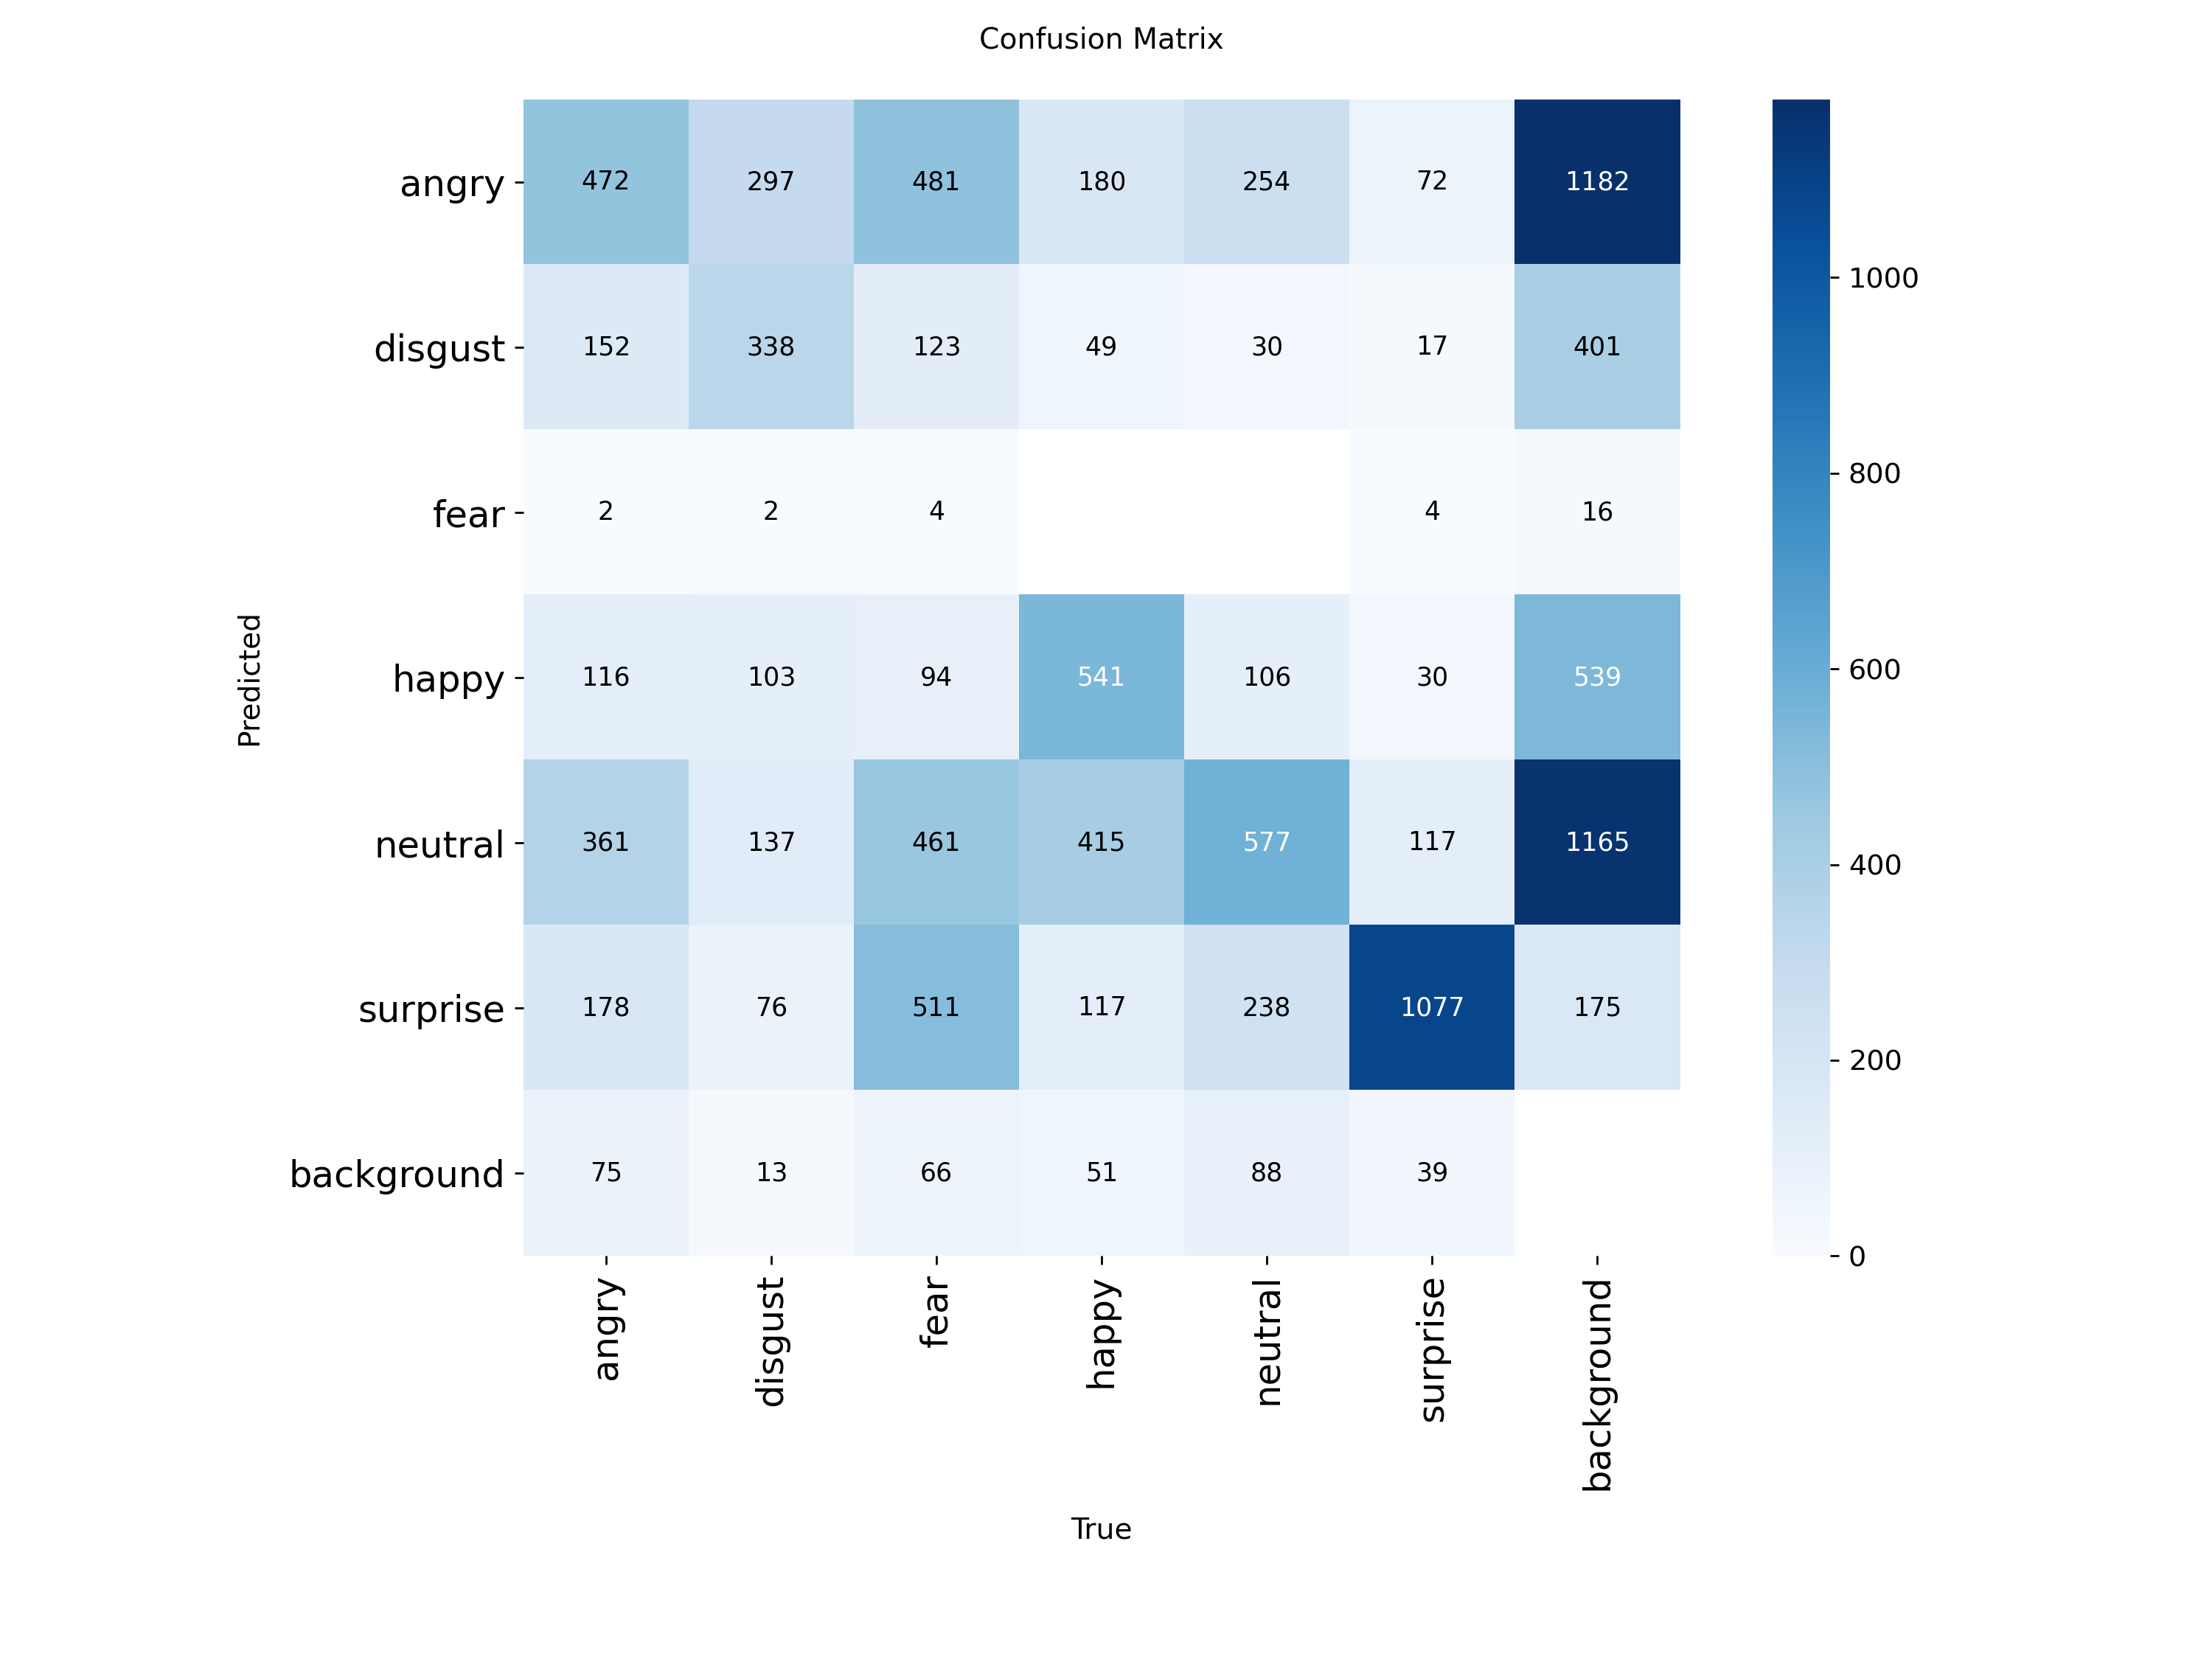

In [11]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

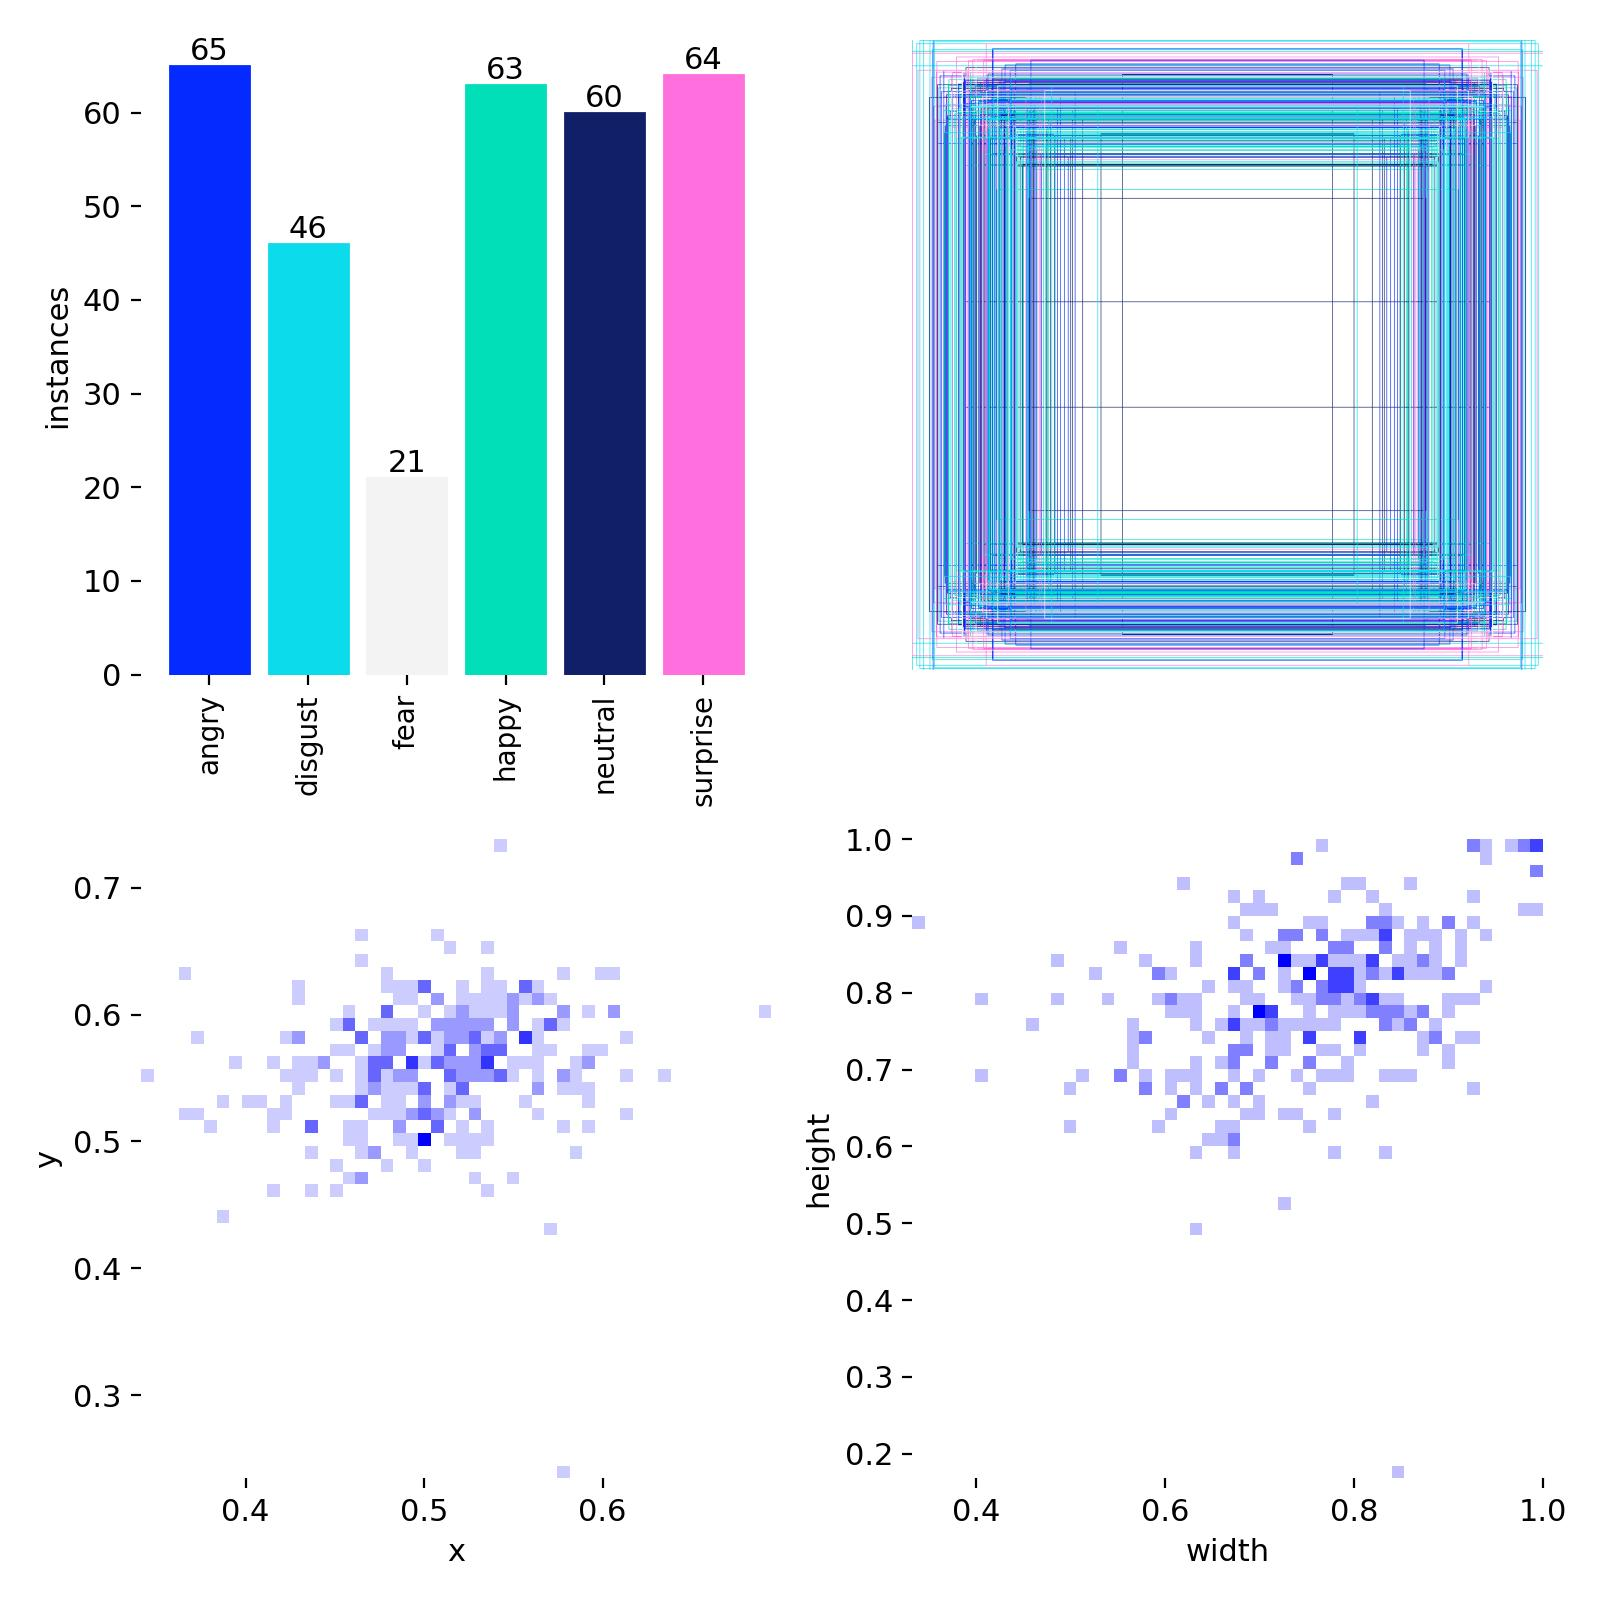

In [12]:
Image(filename='runs/detect/train/labels.jpg', width=600)

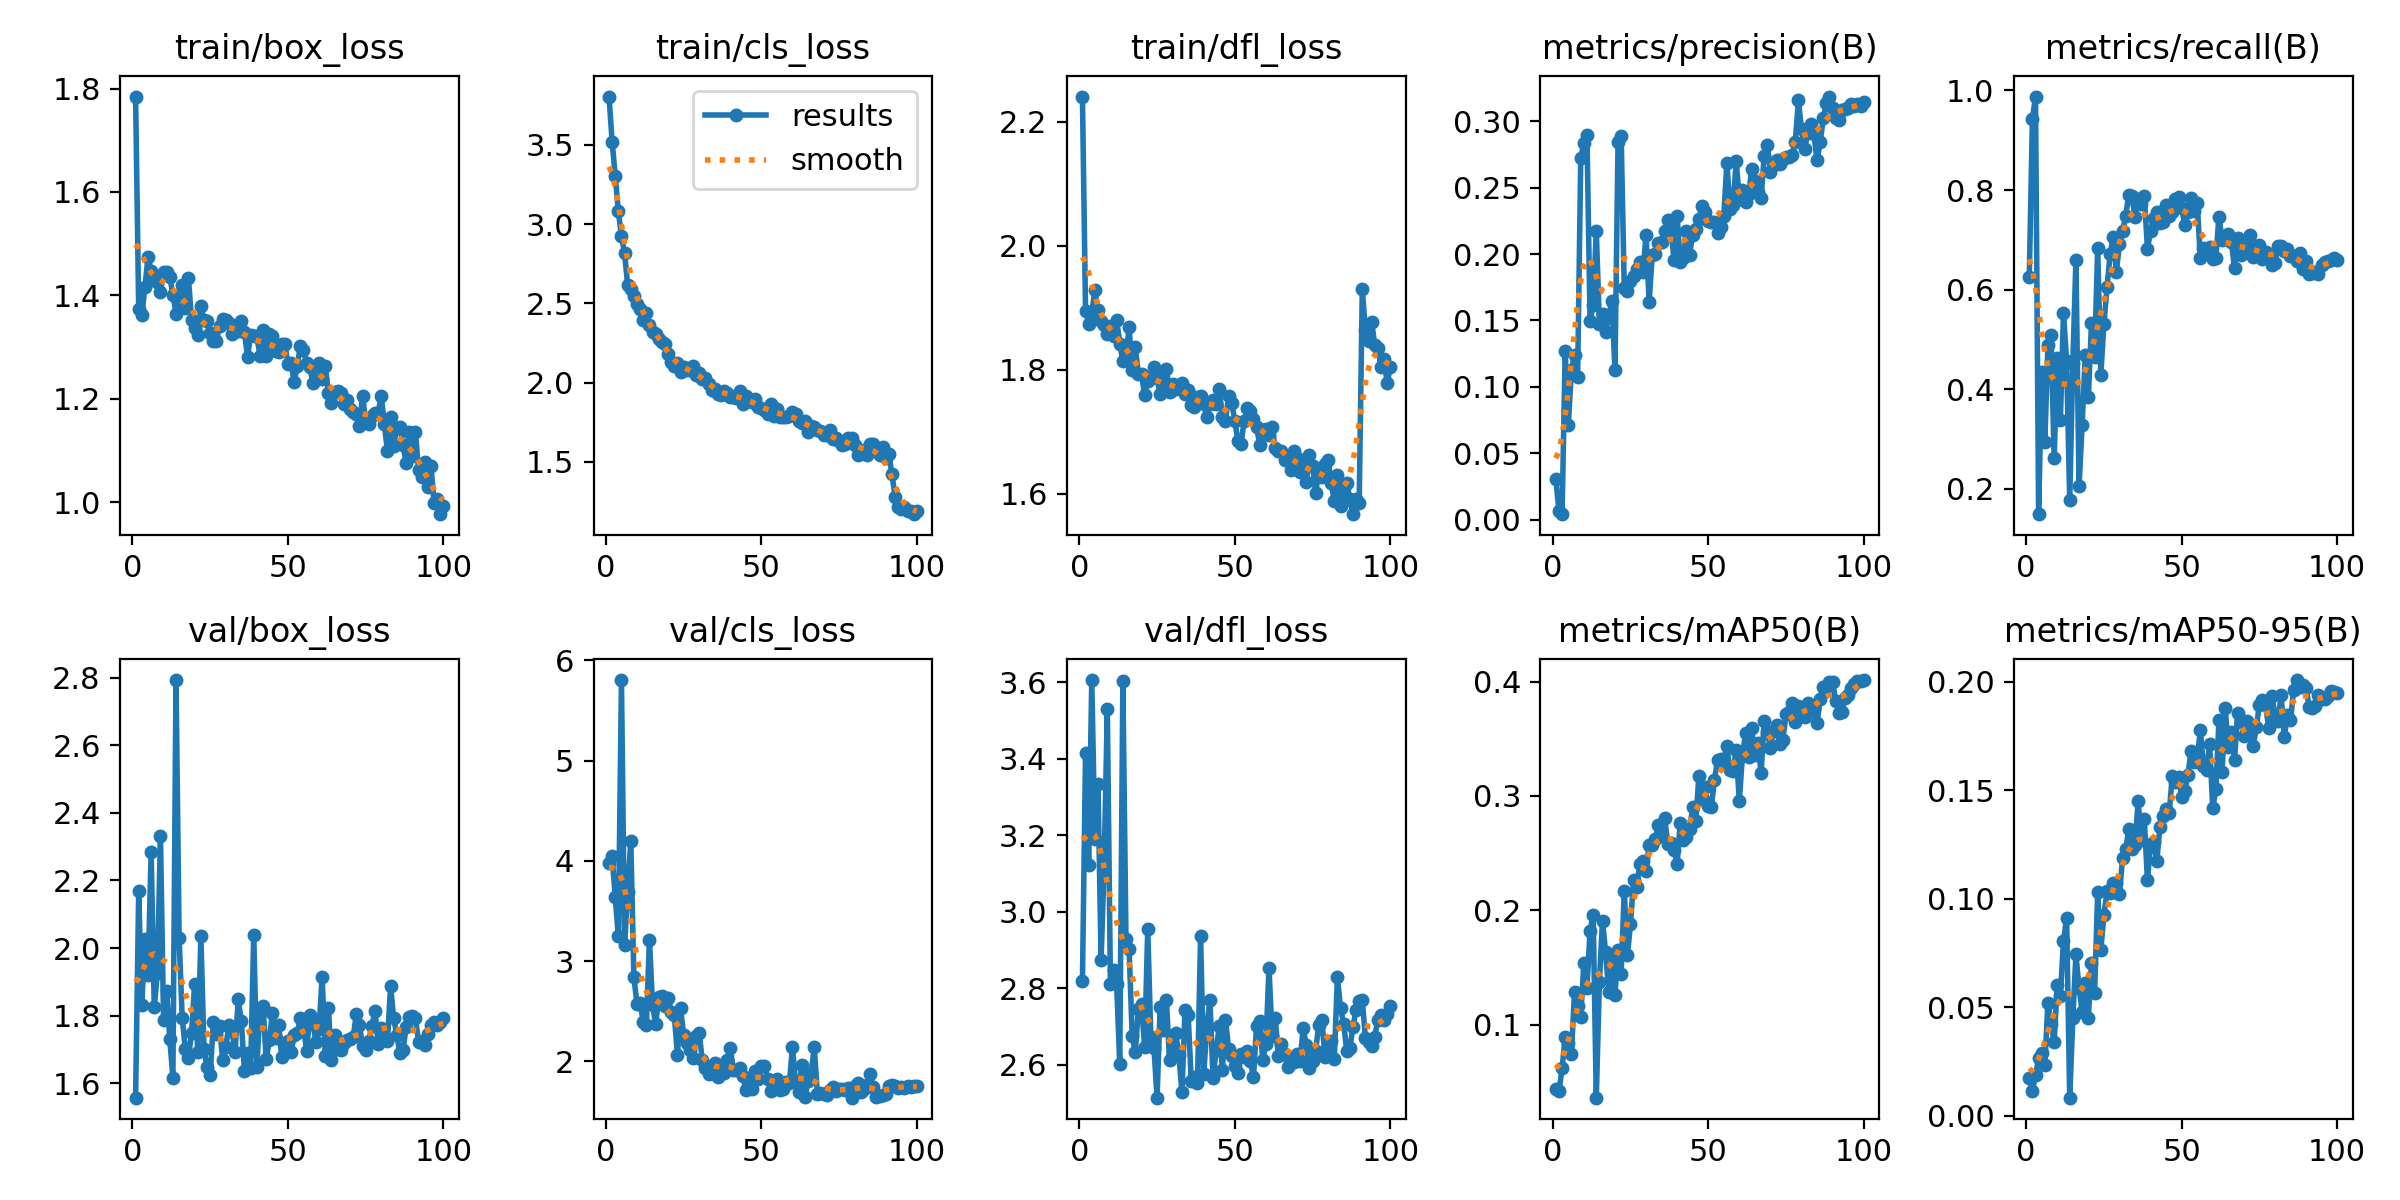

In [13]:
Image(filename='runs/detect/train/results.png', width=600)

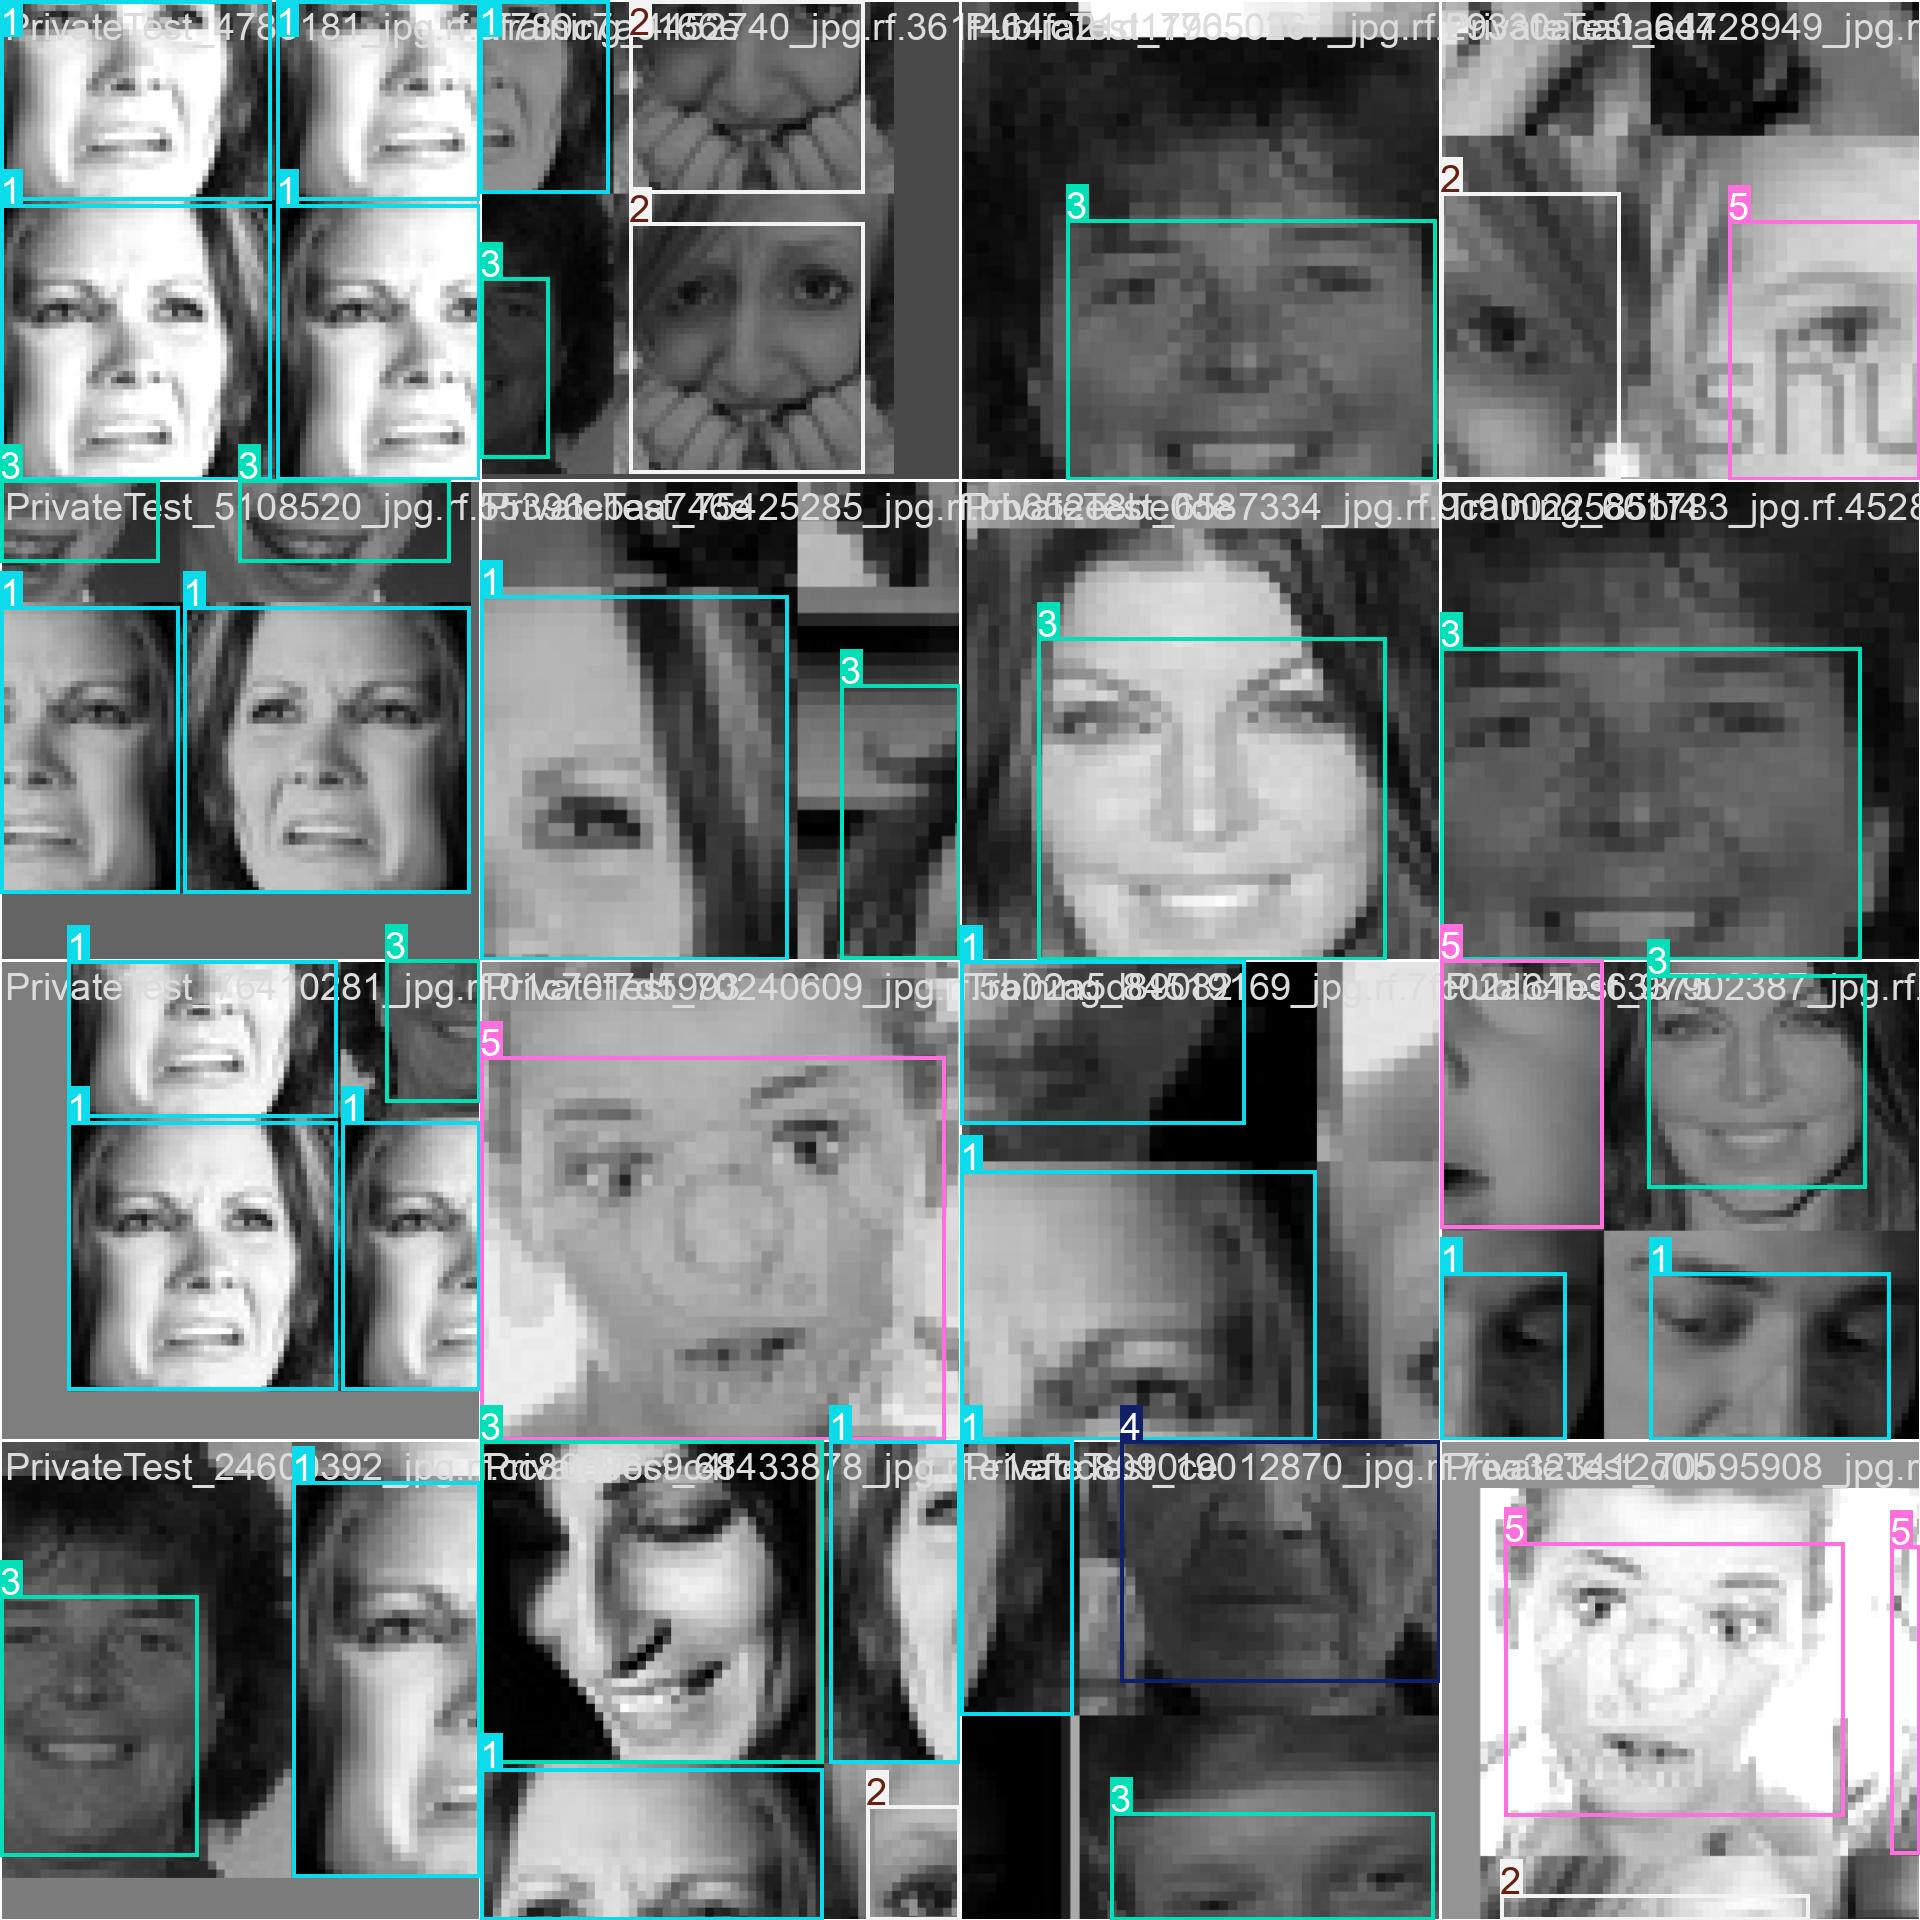

In [14]:
Image(filename='runs/detect/train/train_batch0.jpg', width=600)

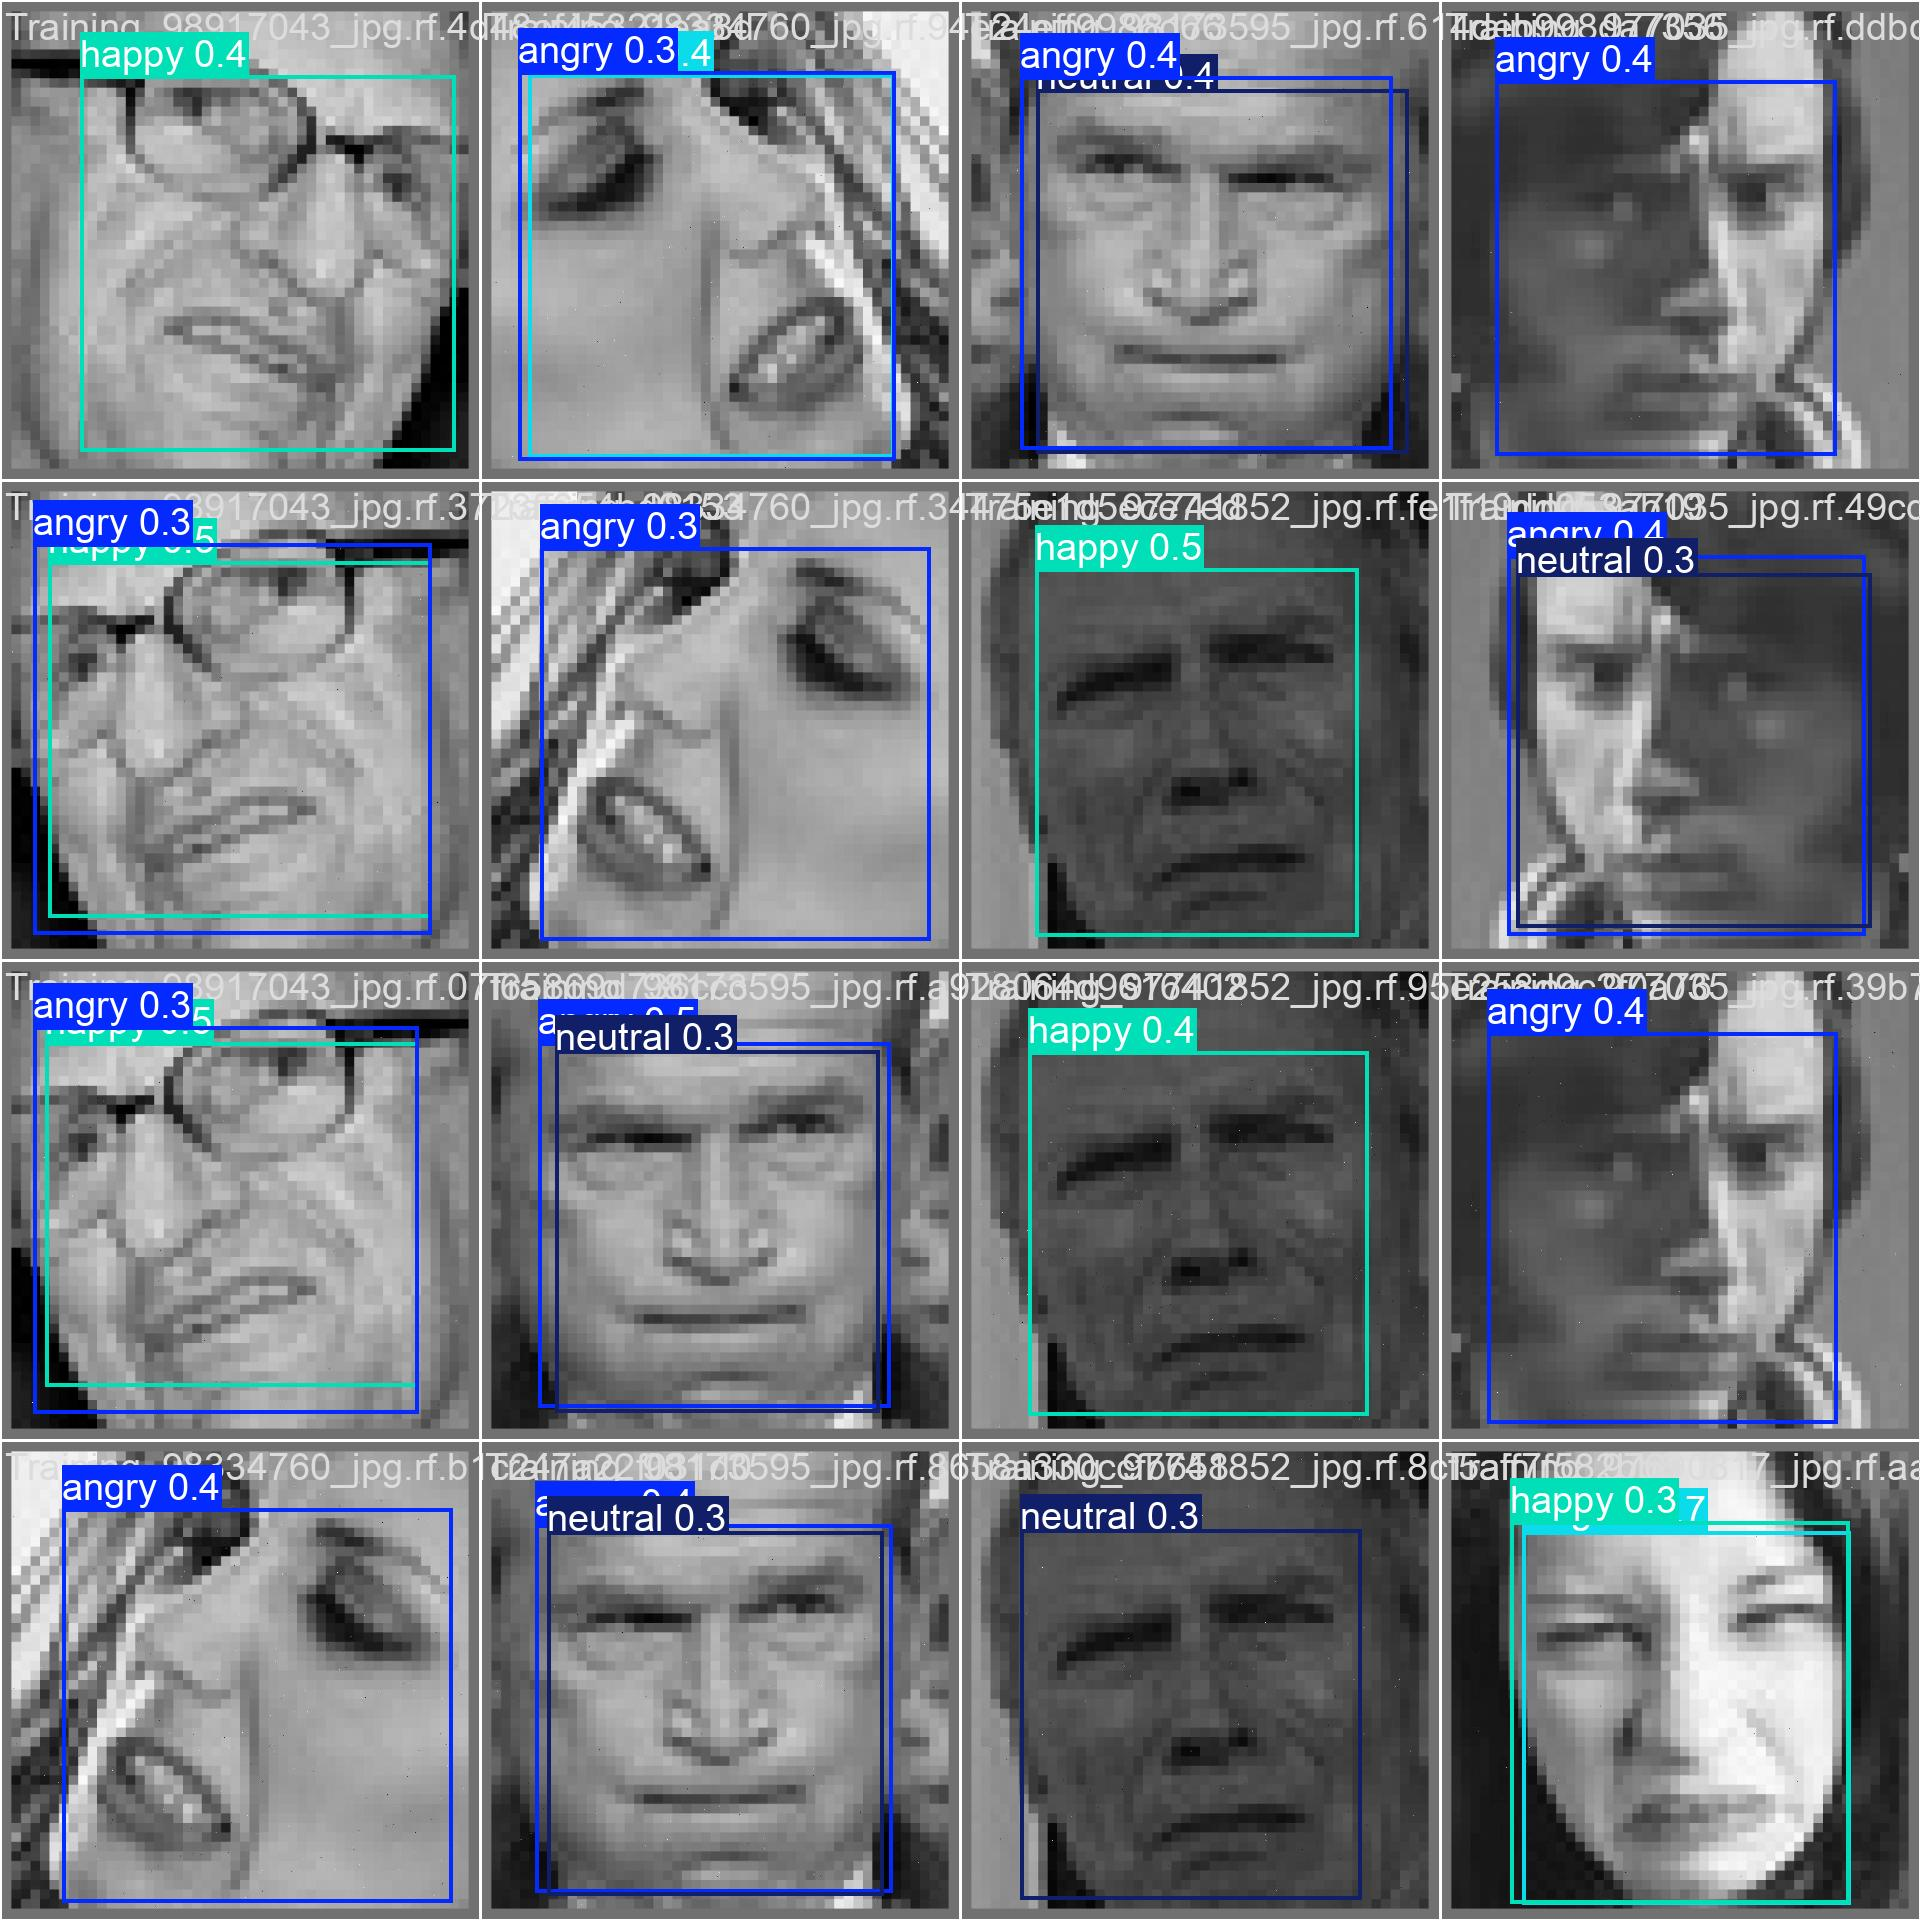

In [15]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [17]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1121.8±464.2 MB/s, size: 24.5 KB)
val: Scanning /content/facial-emotion-detection-2/train/labels.cache... 8025 images, 9 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 8025/8025 122844122.6it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 502/502 7.5it/s 1:07
                   all       8025       8064      0.302      0.658      0.396      0.201
                 angry       1344       1356      0.218      0.802       0.26       0.14
               disgust        966        966      0.327      0.637      0.427      0.224
                  fear       1725       1740      0.277      0.221      0.248      0.126
                 happy       1335       1353      0.391      0.657      0.558      0.273
               n

In [18]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

image 1/319 /content/facial-emotion-detection-2/test/images/PrivateTest_104142_jpg.rf.9a569f399faab32d109985691422e002.jpg: 640x640 (no detections), 10.8ms
image 2/319 /content/facial-emotion-detection-2/test/images/PrivateTest_10427382_jpg.rf.66161547f705d89b7d90ce22fb483f93.jpg: 640x640 1 surprise, 8.0ms
image 3/319 /content/facial-emotion-detection-2/test/images/PrivateTest_11123843_jpg.rf.35ba78a270d8b0c298771c2251f0b6d8.jpg: 640x640 1 neutral, 8.0ms
image 4/319 /content/facial-emotion-detection-2/test/images/PrivateTest_1140198_jpg.rf.4c14778e770258d71c02ee3b8586f1fb.jpg: 640x640 1 disgust, 1 happy, 7.9ms
image 5/319 /content/facial-emotion-detection-2/test/images/PrivateTest_12052491_jpg.rf.f7f20b0f5e28f3feb0627064c3f8f166.jpg: 640x640 1 happy, 7.9ms
image 6/319 /content/facial-emotion-detection-2/test/images/Privat

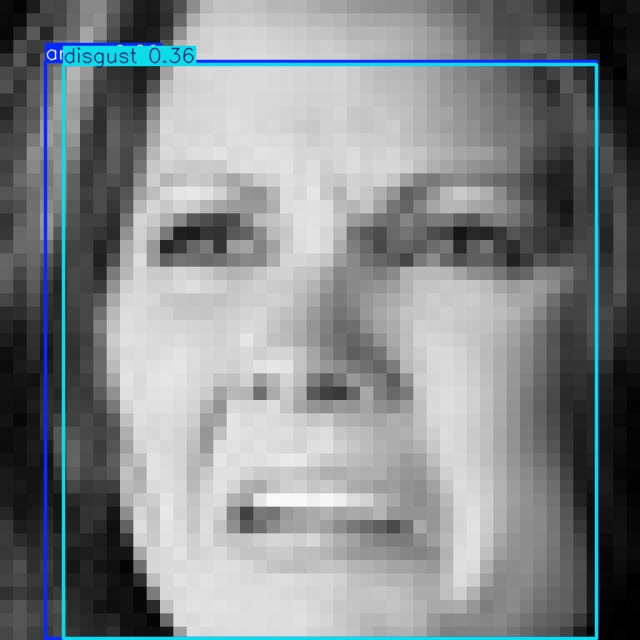

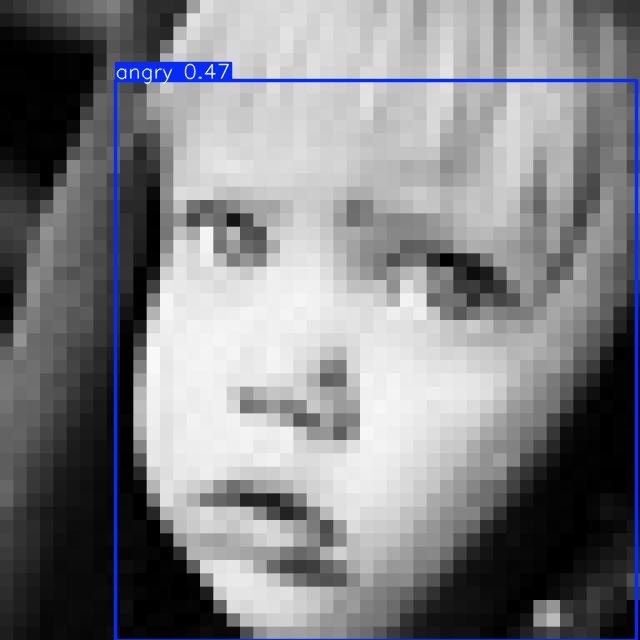

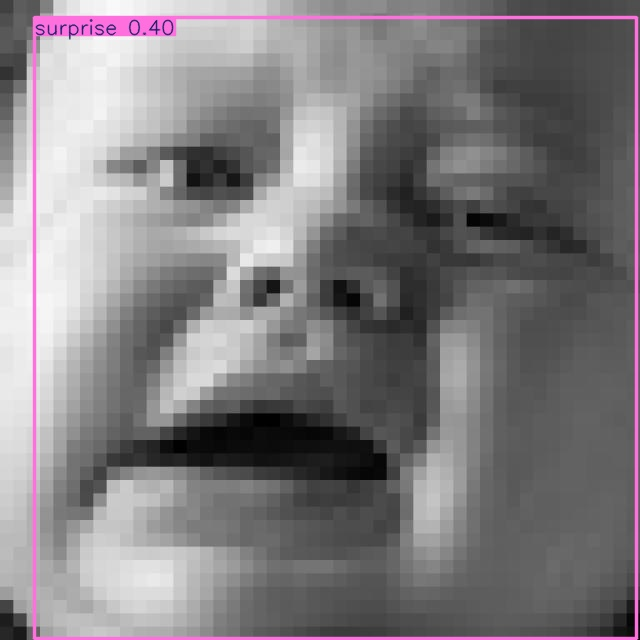

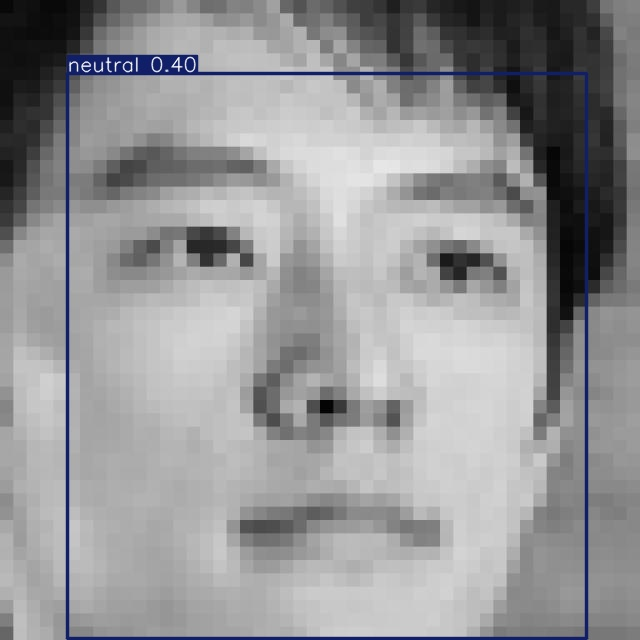

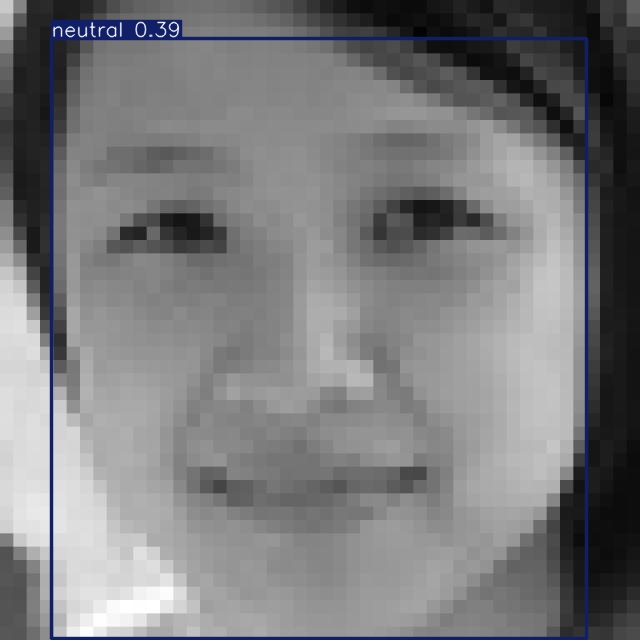

In [21]:
import glob
import os
from IPython.display import Image, display

folder = max(glob.glob("/content/runs/detect/predict*/"), key=os.path.getctime)
for image_path in glob.glob(f"{folder}/*.jpg")[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [22]:
ultralytics.__version__

'8.3.189'